# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

print(weather_api_key)

1ce87162eb24a7710632b5d8bb8c5162


### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 601


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url =  "https://api.openweathermap.org/data/2.5/weather?q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather ['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | wacheng
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | hotan
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | angra do heroismo
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | iqaluit
Processing Record 12 of Set 1 | vorgashor
Processing Record 13 of Set 1 | constantia
Processing Record 14 of Set 1 | iskateley
Processing Record 15 of Set 1 | mejit
Processing Record 16 of Set 1 | kailua-kona
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | novotroitskaya
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | baloda bazar
Processing Record 21 of Set 1 | dudinka
Processing Record 22 of Set 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,278.96,75,75,12.86,AR,1733008699
1,wacheng,33.7833,114.5167,280.02,55,0,3.33,CN,1733008700
2,bethel,41.3712,-73.4140,273.65,64,88,0.89,US,1733008702
3,yellowknife,62.4560,-114.3525,255.68,78,100,3.60,CA,1733008703
4,hotan,37.0997,79.9269,273.05,48,99,1.44,CN,1733008704


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,278.96,75,75,12.86,AR,1733008699
1,wacheng,33.7833,114.5167,280.02,55,0,3.33,CN,1733008700
2,bethel,41.3712,-73.4140,273.65,64,88,0.89,US,1733008702
3,yellowknife,62.4560,-114.3525,255.68,78,100,3.60,CA,1733008703
4,hotan,37.0997,79.9269,273.05,48,99,1.44,CN,1733008704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

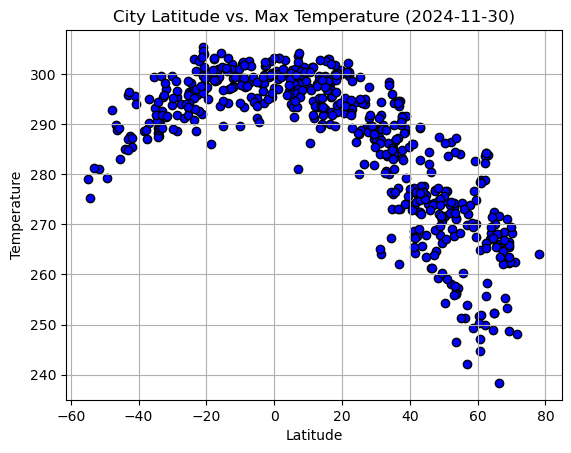

In [14]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
plt.scatter(latitude, temperature, c="blue", marker="o", edgecolors='black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("City Latitude vs. Max Temperature (2024-11-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

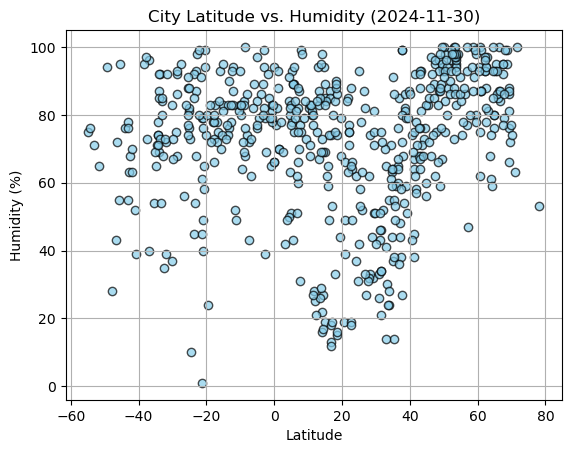

In [15]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df['Humidity']
plt.scatter(latitude, humidity, c="skyblue", marker="o", edgecolors='black',alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2024-11-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

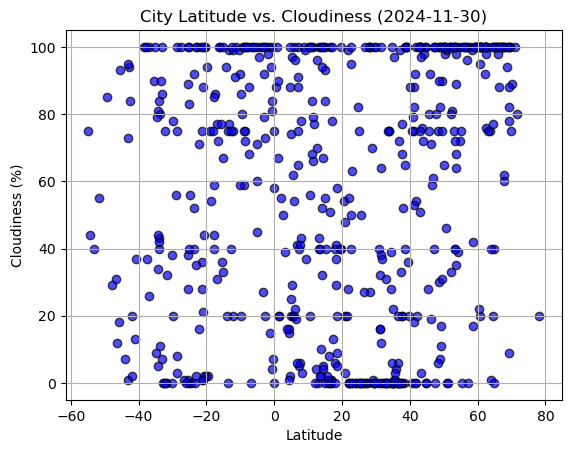

In [16]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df['Cloudiness']
plt.scatter(latitude, cloudiness, c="blue", marker="o", edgecolors='black',alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2024-11-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

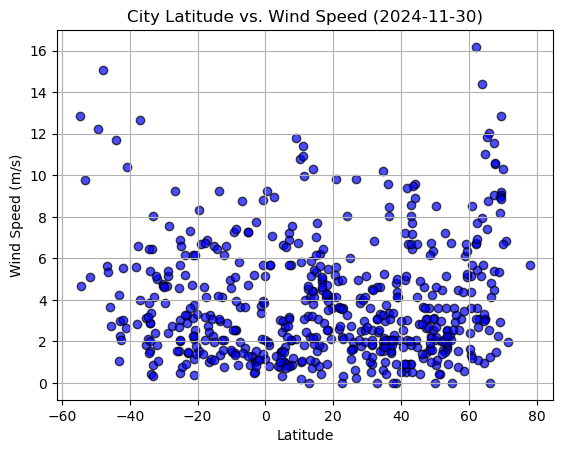

In [17]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df['Wind Speed']
plt.scatter(latitude, wind_speed, c="blue", marker="o", edgecolors='black',alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-11-30)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots

#[JT] - I created to functions here so that I the option to annotate in the linear equation into the plot in the upper and lower right corners.
# I simply picked the best version for each plot (the one that will best display the annotation).
# I used help from AI to properly specify a function that is dynamic. Really, AI helped me with the y_line and plot.annotate() parts of the code. I was getting a value error since I was not iterating trhough x values to calculate y.
# I also wanted to display the linear equation in a neat way, so AI helped me understand how to use axes fraction to indicate top or bottom right coordinates in x/y axis fractions/proportions.

def linear_regression_plot (x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress (x,y)
    print(f'The R-squared for this regression is {r_value**2:.4f}')
    linear_eq = "y = " + str(round(slope,2)) + "X + "+ str(round(intercept,2))
    y_line = [intercept + slope * xi for xi in x]
    plt.figure(figsize=(10,6))
    plt.plot(x, y_line, color="red")
    plt.scatter(x,y,color='blue', marker="o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(linear_eq, xy=(0.95, 0.95), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='none'), verticalalignment='top', horizontalalignment='right')
    plt.show()


def linear_regression_plot_2 (x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress (x,y)
    print(f'The R-squared for this regression is {r_value**2:.4f}')
    linear_eq = "y = " + str(round(slope,2)) + "X + "+ str(round(intercept,2))
    y_line = [intercept + slope * xi for xi in x]
    plt.figure(figsize=(10,6))
    plt.plot(x, y_line, color="red")
    plt.scatter(x,y,color='blue', marker="o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.annotate(linear_eq, xy=(0.95, 0.20), xycoords='axes fraction', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='none'), verticalalignment='top', horizontalalignment='right')
    plt.show()


In [55]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,wacheng,33.7833,114.5167,280.02,55,0,3.33,CN,1733008700
2,bethel,41.3712,-73.4140,273.65,64,88,0.89,US,1733008702
3,yellowknife,62.4560,-114.3525,255.68,78,100,3.60,CA,1733008703
4,hotan,37.0997,79.9269,273.05,48,99,1.44,CN,1733008704
6,hamilton,39.1834,-84.5333,274.31,51,100,4.12,US,1733008700


In [56]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,278.96,75,75,12.86,AR,1733008699
5,saint-philippe,-21.3585,55.7679,297.09,79,36,3.15,RE,1733008705
8,port-aux-francais,-49.3500,70.2167,279.17,94,85,12.22,TF,1733008709
9,edinburgh of the seven seas,-37.0676,-12.3116,290.13,96,100,12.66,SH,1733008710
16,port alfred,-33.5906,26.8910,289.92,92,80,0.45,ZA,1733008718


###  Temperature vs. Latitude Linear Regression Plot

The R-squared for this regression is 0.7139


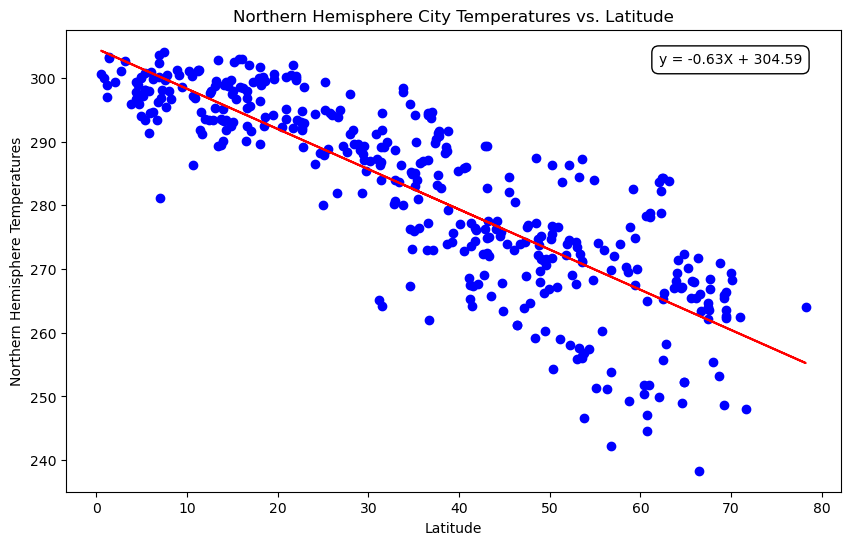

In [120]:
# Linear regression on Northern Hemisphere
xtemp = northern_hemi_df['Lat']
ytemp = northern_hemi_df['Max Temp']
xlabel_temp = "Latitude"
ylabel_temp = "Northern Hemisphere Temperatures"
title_temp = "Northern Hemisphere City Temperatures vs. Latitude"

linear_regression_plot (xtemp, ytemp, xlabel_temp, ylabel_temp, title_temp)



The R-squared for this regression is 0.4556


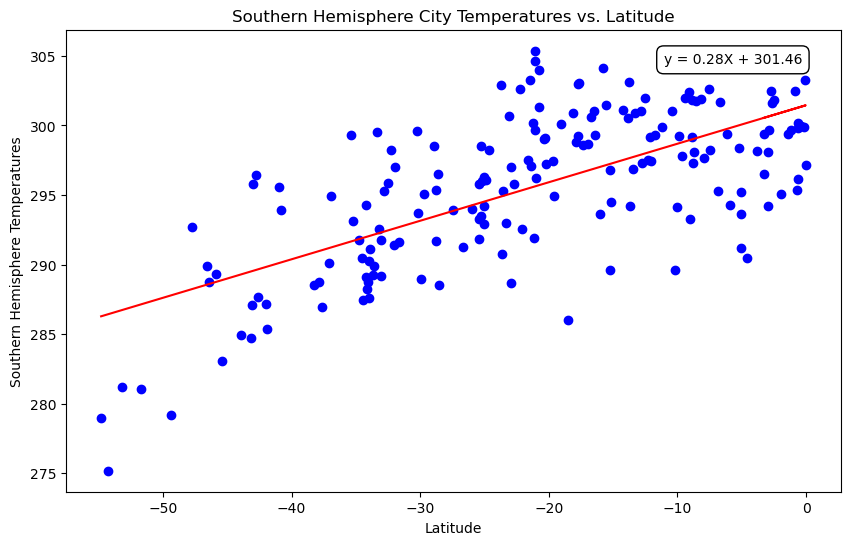

In [122]:
# Linear regression on Southern Hemisphere
xtemp2 = southern_hemi_df['Lat']
ytemp2 = southern_hemi_df['Max Temp']
xlabel_temp2 = "Latitude"
ylabel_temp2 = "Southern Hemisphere Temperatures"
title_temp2 = "Southern Hemisphere City Temperatures vs. Latitude"

linear_regression_plot (xtemp2, ytemp2, xlabel_temp2, ylabel_temp2, title_temp2)

**Discussion about the linear relationship:** #[JT] - Based on the results obtained, we cannot conclude that there is a correlaion between latitudes and the maximum observed temperatures across the southern hemisphere. The predictive power of this regression is low at 45.6%, and the r-value is around only 0.60. We do better in the northern hemisphere though, as our regression model captures more than 70% of the variability (~0.80), suggesting that latitudes across the northern hemisphere can explain changes in city temperatures (the correlation is strong).

### Humidity vs. Latitude Linear Regression Plot

The R-squared for this regression is 0.1239


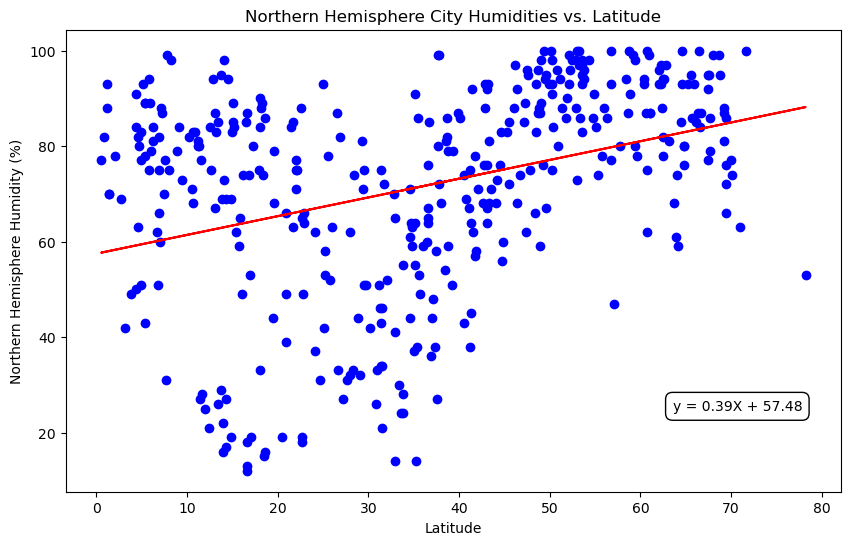

In [103]:
# Northern Hemisphere
xtemp3 = northern_hemi_df['Lat']
ytemp3 = northern_hemi_df['Humidity']
xlabel_temp3 = "Latitude"
ylabel_temp3 = "Northern Hemisphere Humidity (%)"
title_temp3 = "Northern Hemisphere City Humidities vs. Latitude"

linear_regression_plot_2 (xtemp3, ytemp3, xlabel_temp3, ylabel_temp3, title_temp3)

The R-squared for this regression is 0.0379


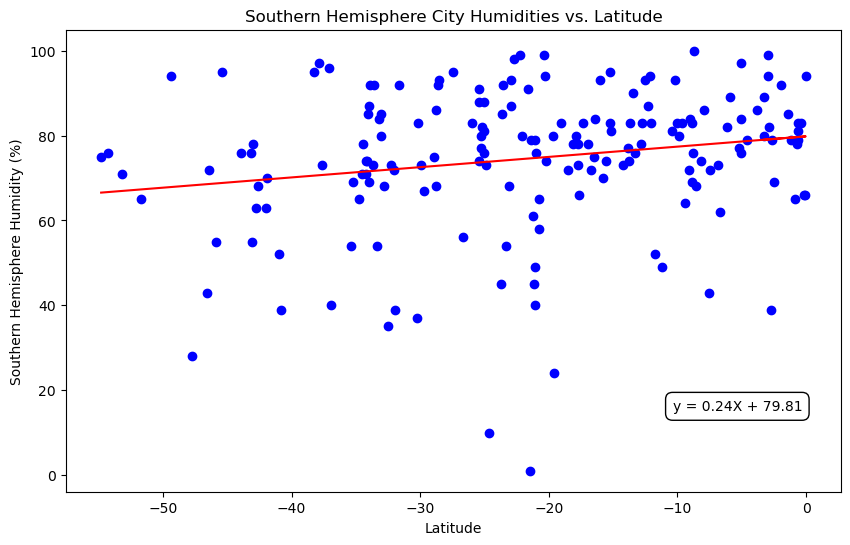

In [104]:
# Southern Hemisphere
xtemp4 = southern_hemi_df['Lat']
ytemp4 = southern_hemi_df['Humidity']
xlabel_temp4 = "Latitude"
ylabel_temp4 = "Southern Hemisphere Humidity (%)"
title_temp4 = "Southern Hemisphere City Humidities vs. Latitude"

linear_regression_plot_2 (xtemp4, ytemp4, xlabel_temp4, ylabel_temp4, title_temp4)

**Discussion about the linear relationship:** [JT] - The two linear regression models above aim to explain how changes in latitude explain humidity levels in cities across the northern and souther hemispheres. Based on the results obtained, we cannot conclude that there is a correlation between the latitude and humidity levels in neither hemisphere. Both R-squared values are quite low, which indicate that the vast majority of the variability in humidity levels is not explained by changes in latitude. In the northern hemisphere plot, the data does not vary consistently along the regression line either. And in the sourthern hemisphere plot the slope is very small, and is likely being impacted by the visible outliers in the negative latitudes (e.g. y values in the 0-40 range across the x axis)

### Cloudiness vs. Latitude Linear Regression Plot

The R-squared for this regression is 0.1140


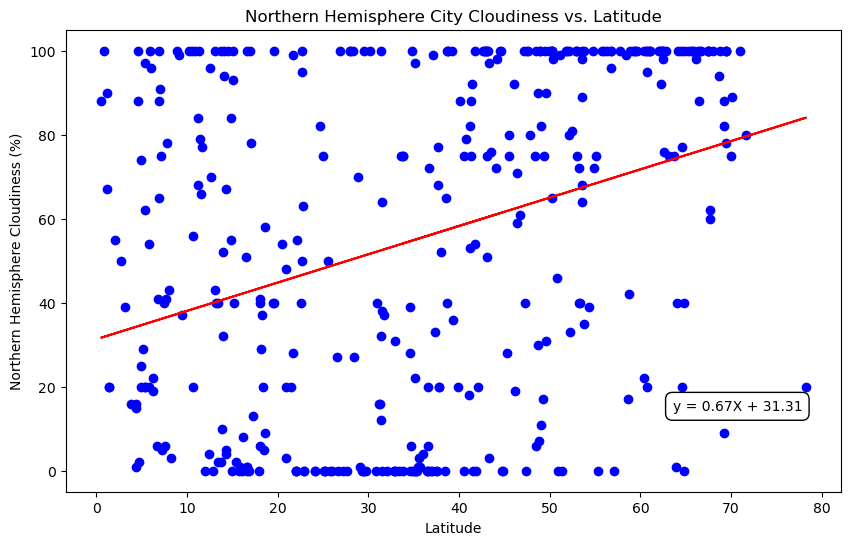

In [105]:
# Northern Hemisphere
xtemp5 = northern_hemi_df['Lat']
ytemp5 = northern_hemi_df['Cloudiness']
xlabel_temp5 = "Latitude"
ylabel_temp5 = "Northern Hemisphere Cloudiness (%)"
title_temp5 = "Northern Hemisphere City Cloudiness vs. Latitude"

linear_regression_plot_2 (xtemp5, ytemp5, xlabel_temp5, ylabel_temp5, title_temp5)

The R-squared for this regression is 0.0642


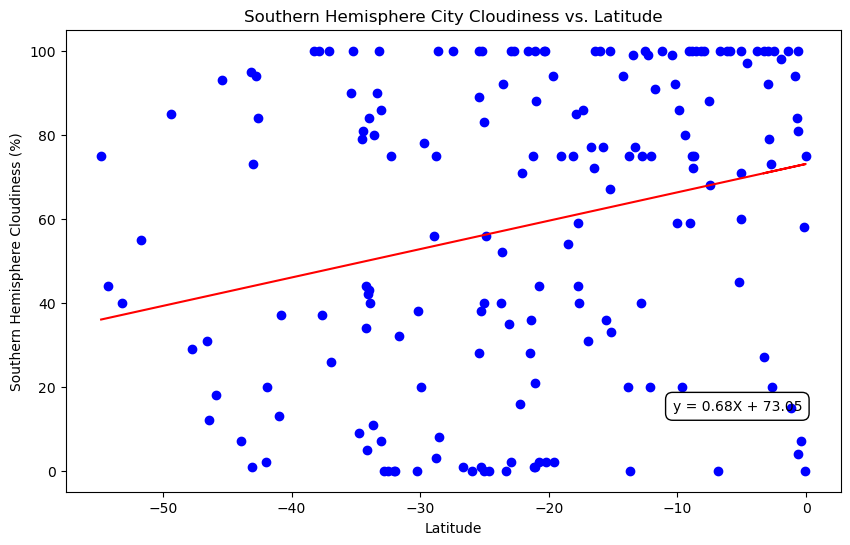

In [106]:
# Southern Hemisphere
xtemp6 = southern_hemi_df['Lat']
ytemp6 = southern_hemi_df['Cloudiness']
xlabel_temp6 = "Latitude"
ylabel_temp6 = "Southern Hemisphere Cloudiness (%)"
title_temp6 = "Southern Hemisphere City Cloudiness vs. Latitude"

linear_regression_plot_2 (xtemp6, ytemp6, xlabel_temp6, ylabel_temp6, title_temp6)

**Discussion about the linear relationship:** [JT] - There is no relationship between latitudes and cloudiness levels in cities across the northern or southern hemispheres, as evidenced by the low R-squared values in both plots. There's also
a high concentration of values around the 100 and 0 % levels, and anything in betweeen is pretty randomly spread out across the plot. These are causing the spreads/standard errors to be quite large.

### Wind Speed vs. Latitude Linear Regression Plot

The R-squared for this regression is 0.0279


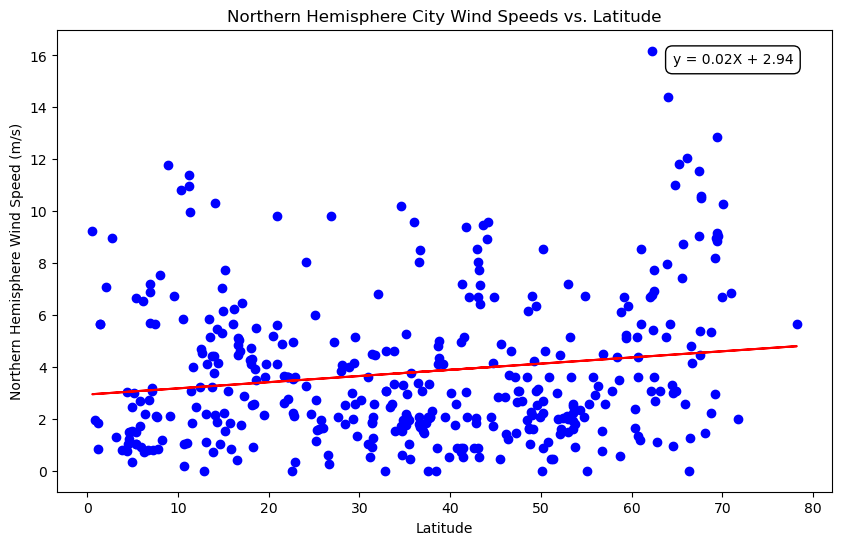

In [111]:
# Northern Hemisphere
xtemp7 = northern_hemi_df['Lat']
ytemp7 = northern_hemi_df['Wind Speed']
xlabel_temp7 = "Latitude"
ylabel_temp7 = "Northern Hemisphere Wind Speed (m/s)"
title_temp7 = "Northern Hemisphere City Wind Speeds vs. Latitude"

linear_regression_plot (xtemp7, ytemp7, xlabel_temp7, ylabel_temp7, title_temp7)

The R-squared for this regression is 0.0749


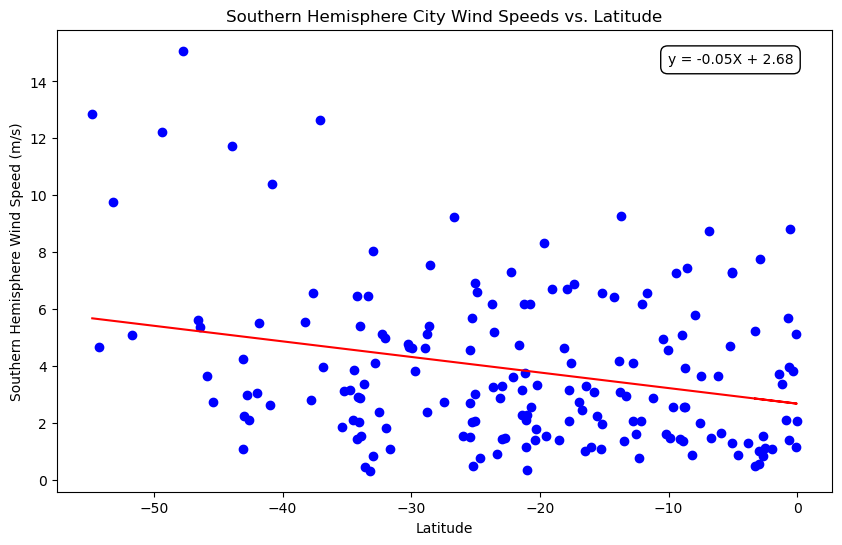

In [110]:
# Southern Hemisphere
xtemp8 = southern_hemi_df['Lat']
ytemp8 = southern_hemi_df['Wind Speed']
xlabel_temp8 = "Latitude"
ylabel_temp8 = "Southern Hemisphere Wind Speed (m/s)"
title_temp8 = "Southern Hemisphere City Wind Speeds vs. Latitude"

linear_regression_plot (xtemp8, ytemp8, xlabel_temp8, ylabel_temp8, title_temp8)

**Discussion about the linear relationship:** [JT] - There is no relationship/correlation between latitudes and wind speeds in cities across the northern or southern hemispheres, as evidenced by the low R-squared values in both plots. In these cases,
the majority of the data is concentrated in the lower values in the y-axis (m/s), call it 0-7. The virtually non-existing slopes here (0.05 and 0.02) also give away the answer, and are being driven by the upper right and upper left of
the plots, respectively.